# Entrega 4

Descripción del conjunto de datos de Kaggle S3E14:

El conjunto de datos para esta competencia (tanto el conjunto de entrenamiento como el de prueba) se generó a partir de un modelo de aprendizaje profundo entrenado en el conjunto de datos de Predicción de Rendimiento de Arándanos Silvestres. Las distribuciones de características son similares, pero no exactamente iguales, a las originales.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import plot_tree

from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier

import numpy as np
from itertools import product

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("playground-series-s3e14/train.csv")

df.drop('id', axis=1, inplace = True)

## Dataframe: Playground series 3 episode 14 - EDA

### Predecir el rendimiento de un campo de arandanos (Regresion)

In [2]:
print("El playground series episodio 14 tiene ", len(df), " filas y ", df.shape[1], " columnas.")

El playground series episodio 14 tiene  15289  filas y  17  columnas.


Para el primer dataframe, se describen las siguientes features:

* Clonesize (m2) Tamaño promedio del clon de arándanos en el campo

* Honeybee (bees/m2/min) Densidad de abejas melíferas en el campo

* Bumbles (bees/m2/min) Densidad de abejorros en el campo

* Andrena (bees/m2/min) Densidad de abejas Andrena en el campo

* Osmia (bees/m2/min) Densidad de abejas Osmia en el campo

* MaxOfUpperTRange (℃) El registro más alto de la temperatura diaria en la banda superior durante la temporada de floración

* MinOfUpperTRange (℃) El registro más bajo de la temperatura diaria en la banda superior

* AverageOfUpperTRange (℃) El promedio de la temperatura diaria en la banda superior

* MaxOfLowerTRange (℃) El registro más alto de la temperatura diaria en la banda inferior

* MinOfLowerTRange (℃) El registro más bajo de la temperatura diaria en la banda inferior

* AverageOfLowerTRange (℃) El promedio de la temperatura diaria en la banda inferior

* RainingDays (dias) El número total de días durante la temporada de floración, en cada uno de los cuales hay precipitación mayor que cero

* AverageRainingDays (dias) El promedio de días lluviosos de toda la temporada de floración

* Fruit set: Transición de la flor a producir la fruta

* Fruit Mass: peso de un arandano promedio

* Seeds: semillas por arandano.

Considerando esto, notamos que hay 5 principales grupos de variables: tamaño del campo, variables relacionadas a densidad de especies de abejas, variables relacionadas con valores de temperatura, variables midiendo dias de lluvia y variables atribuidas directamente a parametros del fruto.

Las hipótesis que se podrían plantear van de la mano de estos grupos. Uno supondría que estas variables influyen directamente en el rendimiento de un campo por conocimiento general. 

Las abejas tienen un papel fundamental en la polinización de las flores de arándano, lo que resulta en una mayor cantidad de frutos. Su actividad de polinización asegura una mejor fertilización de los arbustos, lo que se traduce en una mayor producción de arandanos de mayor calidad, por ende mayor producción y mayor rendimiento. Por lo tanto, una mayor densidad de abejas en un campo de arándanos aumenta la eficiencia de la polinización y, en última instancia, contribuye significativamente a un rendimiento más abundante.

La temperatura del ambiente desempeña un papel crucial en el rendimiento de un campo de arándanos. Estas plantas son sensibles a las temperaturas, ya que requieren un período de frío durante el invierno para descansar y acumular energía antes de la floración. Sin suficiente frío, la producción de flores y, por lo tanto, de frutos, puede verse afectada negativamente. Además, las altas temperaturas durante la etapa de floración pueden resultar en una menor producción de frutos, lo que reduce el rendimiento. En resumen, un equilibrio adecuado en las temperaturas es esencial para un óptimo rendimiento de un campo de arándanos, influyendo en la producción de flores y frutos de alta calidad.

Por ultimo, la lluvia juega un papel vital en el rendimiento de un campo de arándanos. Estos arbustos necesitan una cantidad adecuada de agua para un crecimiento saludable y una producción abundante de frutos. La lluvia proporciona la hidratación necesaria para las plantas y ayuda a mantener un suelo húmedo, lo que es esencial durante las etapas de floración y producción de frutos. Sin embargo, es importante que la lluvia no sea excesiva, ya que el exceso de humedad puede aumentar el riesgo de enfermedades y afectar negativamente la calidad de los arándanos. En resumen, un equilibrio adecuado de lluvia es esencial para el rendimiento óptimo de un campo de arándanos, garantizando una cosecha abundante y de alta calidad.

Teniendo en cuenta esto, estas variables deberían tener cierta importancia en obtener el rendimiento del campo.

## Descipción inicial de las variables

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
clonesize,15289.0,19.704690,6.595211,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,15289.0,0.389314,0.361643,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,15289.0,0.286768,0.059917,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,15289.0,0.492675,0.148115,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,15289.0,0.592355,0.139489,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,15289.0,82.169887,9.146703,69.700000,77.400000,86.000000,86.000000,94.600000
MinOfUpperTRange,15289.0,49.673281,5.546405,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,15289.0,68.656256,7.641807,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,15289.0,59.229538,6.610640,50.200000,55.800000,62.000000,62.000000,68.200000
MinOfLowerTRange,15289.0,28.660553,3.195367,24.300000,27.000000,30.000000,30.000000,33.000000


In [4]:
pd.DataFrame(df.isna().sum(), columns = ["NaN counts"])

,NaN counts
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0
MaxOfLowerTRange,0
MinOfLowerTRange,0


No hay valores faltantes

## Matriz triangular de correlación

Antes de realizar el análisis de correlación Spearman de las variables, voy a agregar una variable que describa la cantidad de abejas totales. Esto puede describir mejor como afectan las otras variables a la presencia total de abejas, mostrando quizas alguna correlación que no está presente con las features actuales.

In [5]:
df["total_bees"] = df.honeybee + df.bumbles + df.andrena + df.osmia

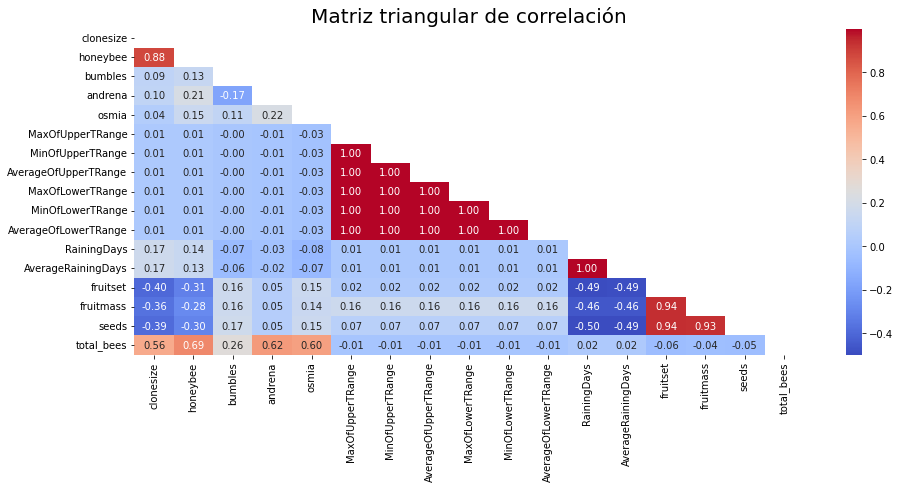

In [6]:
# Extraigo las variables utiles
variables_df = df.drop('yield', axis=1)

# Calculo la matriz de correlación
correlation_matrix = variables_df.corr(method = 'spearman')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Ploteo
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title('Matriz triangular de correlación', size = 20)
plt.show()

La variable agregada no parece mostrar correlación con otras variables, vamos a sacarla. 

Como veo que hay un grupo de variables que estan altamente correlacionadas, vamos a analizar la distribucion de los datos de las mismas mas adelante.

In [7]:
df.drop("total_bees", axis=1,inplace = True)

In [8]:
# Uso esta funcion para extraer el numero de filas dado el numero de columnas que quiero usar para los subplots.

def get_n_rows_axes(n_features, n_cols=5, n_rows=None):
    n_rows = int(np.ceil(n_features / n_cols))
    current_col = range(1, n_cols + 1)
    current_row = range(1, n_rows + 1)
    return n_rows, list(product(current_row, current_col))

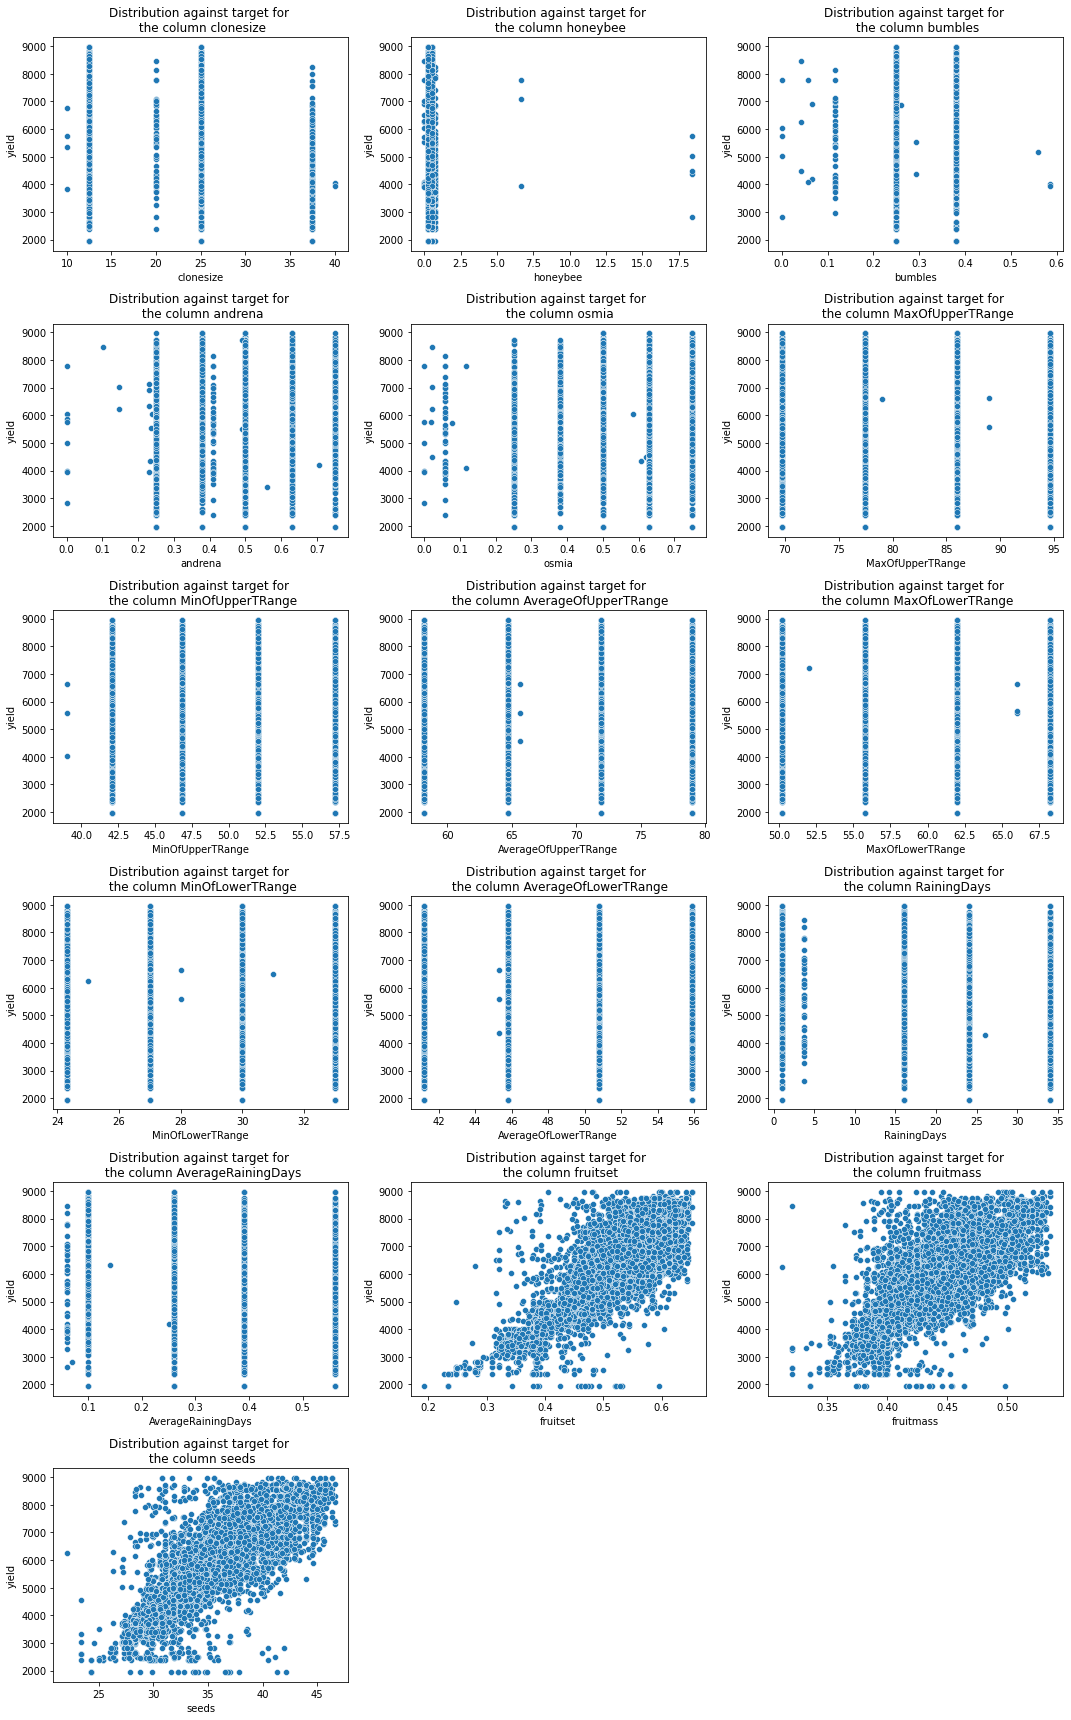

In [9]:
scatter_df = df.drop('yield', axis=1)
target = df["yield"]

n_cols = 3

n_rows, axes = get_n_rows_axes(len(scatter_df.columns), n_cols=n_cols)

plt.figure(figsize=(15, 4*n_rows))

for i, column in enumerate(scatter_df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(data = df, x = column, y = 'yield')
    plt.title(f'Distribution against target for \n the column {column}')
    plt.xlabel(column)
    plt.ylabel('yield')

plt.tight_layout()
plt.show()

Pareciera ser que las variables que mejor explican el yield son el fruitset, fruitmass y seeds. Las otras variables parecieran estar distribuidas en grupos discretos. Donde parecen haber algunos puntos que no pertenecen a ninguno de estos grupos, junto con varios outliers. También esto va de la mano con que las 3 variables mencionadas tienen altos valores de correlación.

Esto se ve particularmente en la variables "honeybee" donde notamos que parecieran haber grupos agrupados cerca de valores chicos, mientras que hay algunos puntos que se muestran lejos, achicando el rango donde se encuentran la mayoria de los datos. Vamos a hacer un analisis de esta variable en particular. Las otras, por mas que tengan valores que no parecen pertenecer a los grupos mayoritarios, se encuentran dentro de un rango de valores esperables para cada variable.

Otro punto a notar es que pareciera haber un salto discreto en el valor de yield cerca de 2000 (el minimo esta en ~1945 como visto arriba). Los valores se encuentran agrupados y estos parecen estar separados.

### Honeybee

In [10]:
df.honeybee.value_counts()

0.500     7832
0.250     7285
0.750      110
0.537       38
0.000       16
18.430       5
6.640        3
Name: honeybee, dtype: int64

Hay 8 valores por arriba de 1, lo cual parecieran ser valores extraños.

In [11]:
print("Estos datos extraños representan el " + str(round(len(df[df.honeybee> 1])/len(df)*100,2))+"% de los datos totales.")

Estos datos extraños representan el 0.05% de los datos totales.


Dicho esto, como no es un grupo representativo vamos a ignorarlos a fines de entrenar el modelo.

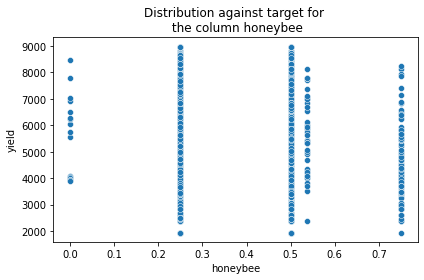

In [12]:
df = df[df.honeybee <= 1]
X = df.copy()

sns.scatterplot(data = df, x = 'honeybee', y = 'yield')
plt.title(f'Distribution against target for \n the column honeybee')
plt.xlabel('honeybee')
plt.ylabel('yield')

plt.tight_layout()
plt.show()

Notamos como mejora esta distribución de los datos comparados con el gráfico arriba (fila 1, columna 2 de los graficos).

## Grupos correlacionados: variables de temperatura

Aca vemos que tiene sentido que estas variables esten correlacionadas, ya que el rango superior de temperatura (minimo y maximo) estan atados el uno al otro. Esto sugiere que cuando uno es mas alto, el otro tiende a ser mas alto también, por lo que la distribución del rango de temperaturas suele mantenerse estable. En cuanto al average, claramente esta correlacionado porque se obtiene de los datos anteriormente mencionados.

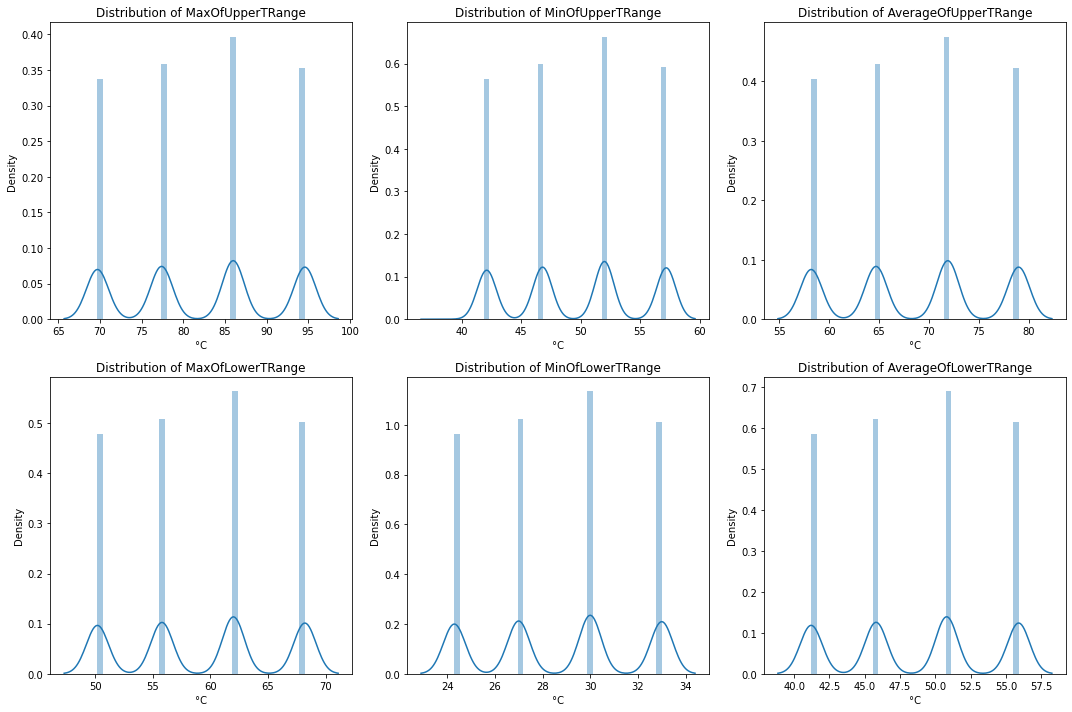

In [13]:
TRange_df = df[[col for col in df.columns if 'TRange' in col]]

n_cols = 3

n_rows, axes = get_n_rows_axes(len(TRange_df.columns), n_cols=n_cols)

plt.figure(figsize=(15, 10))

for i, column in enumerate(TRange_df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.distplot(TRange_df[column], kde=True, hist=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel('°C')

plt.tight_layout()
plt.show()

Esto muestra la densidad de probabilidad junto con el histograma normalizado. Parecen tener la misma forma en cuanto a distribución, esto se puede ver en el siguiente boxplot:

## Analisis de temperatura por indice

Queremos entonces visualizar esto, observando los rangos para maximo y minimo, y como se comportan para cada registro de nuestro dataframe. Ploteo los primeros 300 para observar bien el grafico.

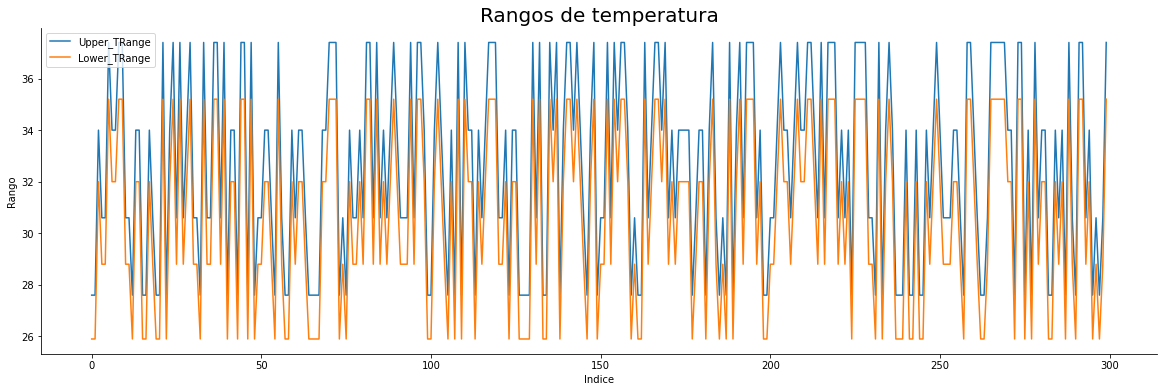

In [14]:
ranges_df = pd.DataFrame()

ranges_df["Upper_TRange"] = TRange_df['MaxOfUpperTRange'] - TRange_df['MinOfUpperTRange']
ranges_df["Lower_TRange"] = TRange_df['MaxOfLowerTRange'] - TRange_df['MinOfLowerTRange']

plt.figure(figsize=(20, 6))
sns.lineplot(data=ranges_df[0:300], dashes=False)
plt.title('Rangos de temperatura', size = 20)
plt.xlabel('Indice')
plt.ylabel('Rango')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Valores del target

Vamos a analizar la distribución del yield, para ver si nuestra variable target tiene algun outlier significativo.

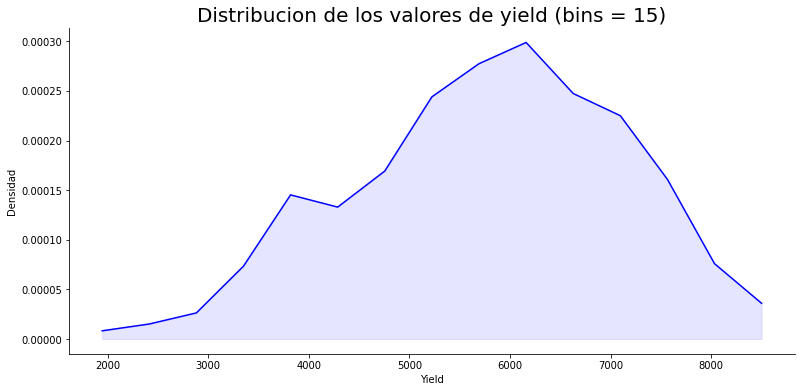

In [15]:
values = df['yield']

bins = 15
density = np.histogram(values, bins=bins, density=True)

plt.figure(figsize=(13, 6))
plt.plot(density[1][:-1], density[0], label='yield', color='blue')

plt.fill_between(density[1][:-1], 0, density[0], alpha=0.1, color='blue')

plt.title('Distribucion de los valores de yield '+ "(bins = "+str(bins)+')', size = 20)
plt.xlabel('Yield')
plt.ylabel('Densidad')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)  
plt.show()

No parece haber algun outlier. Los valores bajos deberian ser los mas dificiles de obtener, ya que el grafico esta significativamente skewed hacia la derecha (asimetría negativa).

# Resumen inicial EDAs

* Los valores de cada feature parecen estar mayoritariamente agrupados en distintas categorías. Se dejaron de lado algunos valores que parecian estar fuera del rango de valores admisibles

* Hay variables que parecen poder agruparse (Variables de temperatura) vamos a posteriormente aplicar un algoritmo de PCA para generar una sola columna.

* No parecen haber valores extraños de yield (rendimiento). Los datos tienen asimetría negativa. Esto puede sesgar al modelo a predecir valores mas altos.

## Colinealidad

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

vif_data.set_index("feature", inplace = True)

vif_data["VIF"] = vif_data["VIF"].apply(lambda x: format(x, '.8f'))
vif_data

,VIF
feature,
clonesize,41.26711551
honeybee,42.21420686
bumbles,27.75207264
andrena,14.83950234
osmia,24.24398355
MaxOfUpperTRange,275981.40695168
MinOfUpperTRange,45418.27128039
AverageOfUpperTRange,2407187.39616421
MaxOfLowerTRange,89763.35225490


Notamos que hay alta colinealidad entre las variables, pudiendo potencialmente sesgar al modelo en un futuro. Probamos reducir la dimensionalidad de las variables con mayor factor de inflación de varianza. Los valores mas altos se corresponden con las variables relacionadas con temperatura.

# Reducción de dimensionalidad por grupo de variables

## Temperatura

In [17]:
df_Temp_dec = PCA()

df_Temp = df_Temp_dec.fit_transform(TRange_df)

print("Se generaron", str(len(df_Temp_dec.explained_variance_)), "componentes.")

Se generaron 6 componentes.


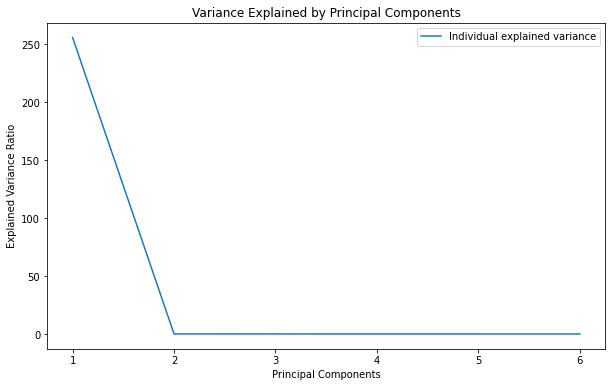

In [18]:
eigenvalues = df_Temp_dec.explained_variance_

cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

plt.figure(figsize=(10, 6))
sns.lineplot(x = range(1, len(eigenvalues) + 1), y = eigenvalues,  label='Individual explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Principal Components')
plt.legend()
plt.show()

Notamos que la varianza acumulada casi que llega al 100% en un solo componente. Por lo tanto reducimos la dimensionalidad a 1 componente para este grupo de variables

In [19]:
df = df[[col for col in df.columns if 'TRange' not in col]]

df_Temp_dec_1 = PCA(n_components = 1)

df_Temp_1 = df_Temp_dec_1.fit_transform(TRange_df)

df["Temp"] = df_Temp_1

df.head()

,clonesize,honeybee,bumbles,andrena,osmia,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield,Temp
0,25.0,0.50,0.25,0.75,0.50,24.0,0.39,0.425011,0.417545,32.460887,4476.81146,21.840387
1,25.0,0.50,0.25,0.50,0.50,24.0,0.39,0.444908,0.422051,33.858317,5548.12201,21.840387
2,12.5,0.25,0.25,0.63,0.63,24.0,0.39,0.552927,0.470853,38.341781,6869.77760,-6.712640
3,12.5,0.25,0.25,0.63,0.50,24.0,0.39,0.565976,0.478137,39.467561,6880.77590,8.296540
4,25.0,0.50,0.25,0.63,0.63,24.0,0.39,0.579677,0.494165,40.484512,7479.93417,8.296540


Buscamos el nuevo VIF despues de la reducción de dimensionalidad.

In [20]:
new_X = df.drop("yield", axis = 1).copy()

vif_data = pd.DataFrame() 
vif_data["feature"] = new_X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(new_X.values, i) 
                          for i in range(len(new_X.columns))] 

vif_data.set_index("feature", inplace = True)

vif_data["VIF"] = vif_data["VIF"].apply(lambda x: format(x, '.8f'))
vif_data

,VIF
feature,
clonesize,41.38428913
honeybee,42.28425228
bumbles,27.74774457
andrena,14.86705748
osmia,24.27113991
RainingDays,197.62834145
AverageRainingDays,272.00441974
fruitset,392.02843804
fruitmass,846.22829341


Notamos como la temperatura deja de ser colineal a las otras, mientras que se mantiene alto para el resto. Bajando de todas formas ya que había colinealidad con las variables de temperatura.

## Fruto

Se generaron 3 componentes.


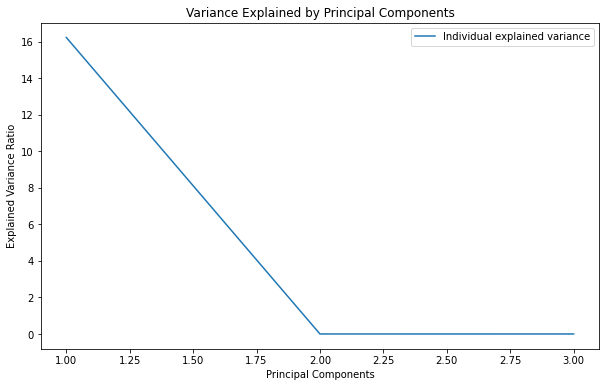

In [21]:
fruit = ["fruitset", "fruitmass", "seeds"]

df_fruit_init = df[fruit]

df_fruit_dec = PCA()

df_fruit = df_fruit_dec.fit_transform(df_fruit_init)

print("Se generaron", str(len(df_fruit_dec.explained_variance_)), "componentes.")

eigenvalues = df_fruit_dec.explained_variance_

cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

plt.figure(figsize=(10, 6))
sns.lineplot(x = range(1, len(eigenvalues) + 1), y = eigenvalues,  label='Individual explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Principal Components')
plt.legend()
plt.show()

In [22]:
df = df[[col for col in df.columns if col not in fruit]]

df_fruit_dec_1 = PCA(n_components = 1)

df_fruit_1 = df_fruit_dec_1.fit_transform(df_fruit_init)

df["Fruit"] = df_fruit_1

df.head()

,clonesize,honeybee,bumbles,andrena,osmia,RainingDays,AverageRainingDays,yield,Temp,Fruit
0,25.0,0.50,0.25,0.75,0.50,24.0,0.39,4476.81146,21.840387,3.708048
1,25.0,0.50,0.25,0.50,0.50,24.0,0.39,5548.12201,21.840387,2.310495
2,12.5,0.25,0.25,0.63,0.63,24.0,0.39,6869.77760,-6.712640,-2.174416
3,12.5,0.25,0.25,0.63,0.50,24.0,0.39,6880.77590,8.296540,-3.300275
4,25.0,0.50,0.25,0.63,0.63,24.0,0.39,7479.93417,8.296540,-4.317411


Buscamos el nuevo VIF despues de la reducción de dimensionalidad.

In [23]:
new_X = df.drop("yield", axis = 1).copy()

vif_data = pd.DataFrame() 
vif_data["feature"] = new_X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(new_X.values, i) 
                          for i in range(len(new_X.columns))] 

vif_data.set_index("feature", inplace = True)

vif_data["VIF"] = vif_data["VIF"].apply(lambda x: format(x, '.8f'))
vif_data

,VIF
feature,
clonesize,38.25592999
honeybee,40.44644080
bumbles,19.17200388
andrena,12.66078191
osmia,21.61062285
RainingDays,179.03263107
AverageRainingDays,242.09395075
Temp,1.01106490
Fruit,1.65829534


Encontramos similitudes con lo mencionado anteriormente. Buscamos reducir lo mismo para los parametros de lluvia.

## Lluvia

Se generaron 2 componentes.


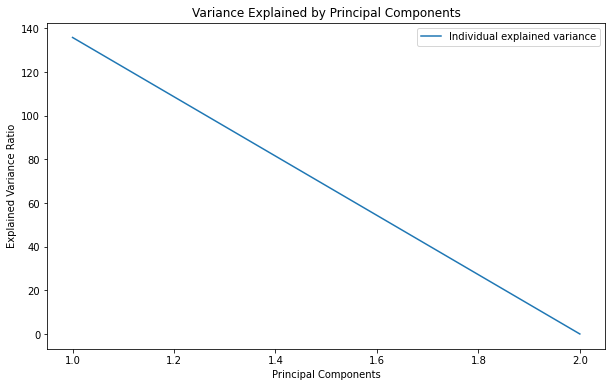

In [24]:
rain_feat = ["RainingDays","AverageRainingDays"]

df_rain_init = df[rain_feat]

df_rain_dec = PCA()

df_rain = df_rain_dec.fit_transform(df_rain_init)

print("Se generaron", str(len(df_rain_dec.explained_variance_)), "componentes.")

eigenvalues = df_rain_dec.explained_variance_

cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

plt.figure(figsize=(10, 6))
sns.lineplot(x = range(1, len(eigenvalues) + 1), y = eigenvalues,  label='Individual explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Principal Components')
plt.legend()
plt.show()

Mismo caso que en la temperatura. Notamos la misma tendencia.

In [25]:
df = df[[col for col in df.columns if col not in rain_feat]]

df_rain_dec_1 = PCA(n_components = 1)

df_rain_1 = df_rain_dec_1.fit_transform(df_rain_init)

df["Rain"] = df_rain_1

df.head()

,clonesize,honeybee,bumbles,andrena,osmia,yield,Temp,Fruit,Rain
0,25.0,0.50,0.25,0.75,0.50,4476.81146,21.840387,3.708048,-5.336837
1,25.0,0.50,0.25,0.50,0.50,5548.12201,21.840387,2.310495,-5.336837
2,12.5,0.25,0.25,0.63,0.63,6869.77760,-6.712640,-2.174416,-5.336837
3,12.5,0.25,0.25,0.63,0.50,6880.77590,8.296540,-3.300275,-5.336837
4,25.0,0.50,0.25,0.63,0.63,7479.93417,8.296540,-4.317411,-5.336837


Buscamos el nuevo VIF despues de la reducción de dimensionalidad.

In [26]:
new_X = df.drop("yield", axis = 1).copy()

vif_data = pd.DataFrame() 
vif_data["feature"] = new_X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(new_X.values, i) 
                          for i in range(len(new_X.columns))] 

vif_data.set_index("feature", inplace = True)

vif_data["VIF"] = vif_data["VIF"].apply(lambda x: format(x, '.8f'))
vif_data

,VIF
feature,
clonesize,37.88920405
honeybee,40.16914025
bumbles,16.66501427
andrena,12.15317055
osmia,20.91287204
Temp,1.01060614
Fruit,1.63439092
Rain,1.30557550


Encontramos similitudes con lo mencionado anteriormente. Buscamos reducir lo mismo para los parametros de abejas.

## Abejas

Se generaron 5 componentes.


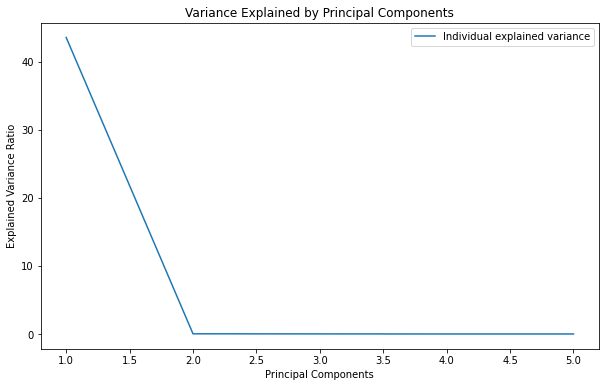

In [27]:
bees_feat = ["clonesize","honeybee","bumbles","andrena","osmia"]

df_bee_init = df[bees_feat]

df_bee_dec = PCA()

df_bee = df_bee_dec.fit_transform(df_bee_init)

print("Se generaron", str(len(df_bee_dec.explained_variance_)), "componentes.")

eigenvalues = df_bee_dec.explained_variance_

cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

plt.figure(figsize=(10, 6))
sns.lineplot(x = range(1, len(eigenvalues) + 1), y = eigenvalues,  label='Individual explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Principal Components')
plt.legend()
plt.show()

Mismo caso que en la temperatura. Notamos la misma tendencia.

In [28]:
df = df[[col for col in df.columns if col not in bees_feat]]

df_bee_dec_1 = PCA(n_components = 1)

df_bee_1 = df_bee_dec_1.fit_transform(df_bee_init)

df["Bee"] = df_bee_1

df.head()

,yield,Temp,Fruit,Rain,Bee
0,4476.81146,21.840387,3.708048,-5.336837,5.297049
1,5548.12201,21.840387,2.310495,-5.336837,5.296683
2,6869.77760,-6.712640,-2.174416,-5.336837,-7.205559
3,6880.77590,8.296540,-3.300275,-5.336837,-7.205539
4,7479.93417,8.296540,-4.317411,-5.336837,5.296853


Buscamos el nuevo VIF despues de la reducción de dimensionalidad.

In [29]:
new_X = df.drop("yield", axis = 1).copy()

vif_data = pd.DataFrame() 
vif_data["feature"] = new_X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(new_X.values, i) 
                          for i in range(len(new_X.columns))] 

vif_data.set_index("feature", inplace = True)

vif_data["VIF"] = vif_data["VIF"].apply(lambda x: format(x, '.8f'))
vif_data

,VIF
feature,
Temp,1.00815346
Fruit,1.51247148
Rain,1.30276850
Bee,1.19093247


Finalizamos el emprolijamiento de las variables. Para entrenar el modelo final, despues realizaremos un pipeline para tener un proceso para cada dataset de entrada.

# Analisis inicial de importancia de las variables

La motivacion de esto es ver cuales son las principales variables que influyen en la obtencion del Yield. No para obtener resultados de alta exactitud, pero para analizar el peso de cada variable en la variable objetivo. Por esto dividimos el modelo en 1 o 0 dependiendo de si el valor del yield esta arriba o abajo de la media respectivamente.

In [30]:
clf = DecisionTreeClassifier()

In [31]:
tree = clf.fit(df.drop("yield",axis = 1), df["yield"].apply(lambda x: 1 if x > df["yield"].mean() else 0))

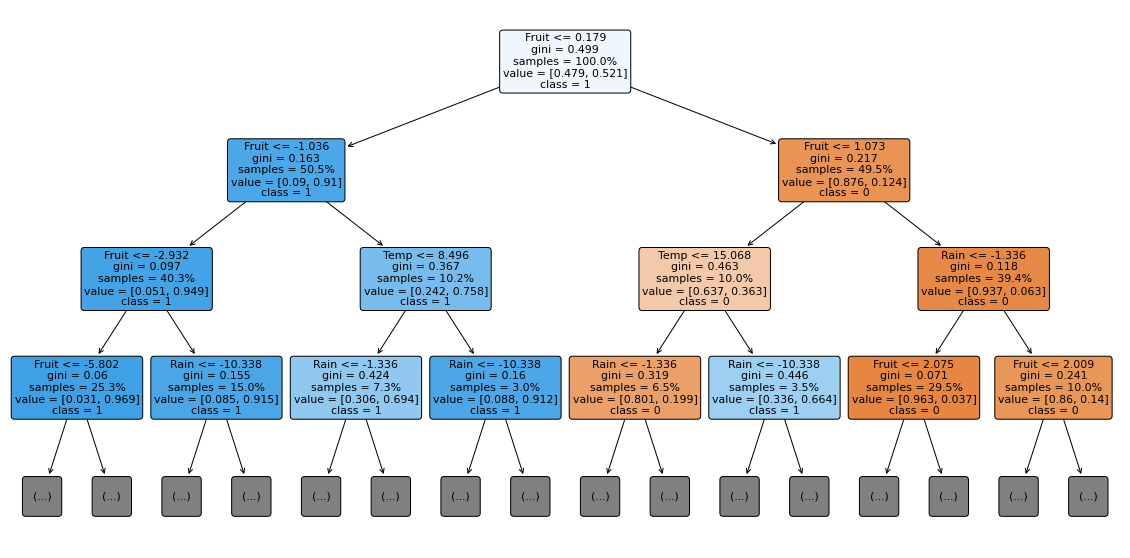

In [32]:
plt.figure(figsize=(20,10))
plot_tree(clf,
          feature_names=["Temp","Fruit","Rain","Bee"],
          class_names=["0","1"],
          rounded=True, 
          filled=True, 
          proportion=True,
         max_depth = 3,
         fontsize=11); 

Notamos que, limitando al arbol a 3 ramificaciones, el número de abejas no tiene ningun peso en la decisión. Claramente la variable mas importante parecería ser la obtenida por la variable generada por los parametros del fruto. Por lo menos para un simple arbol de decisión clasificando los valores de yield mayores a la media.

# Entrenamiento inicial del modelo

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

## Sin reducción de dimensionalidad

In [34]:
n_splits = 4
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

model = RandomForestRegressor(n_estimators = 500,random_state=42)

X_ = X.drop("yield", axis = 1).copy()
y = X["yield"]

iteration = 1

for train_index, test_index in kf.split(X_):
    train = list(train_index)
    test = list(test_index)
    X_train, X_test = X_.iloc[train], X_.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    x_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse_train = mean_squared_error(y_train, x_pred)
    mse_val = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error en train fold {iteration}: {mse_train}')
    print(f'Mean Squared Error en validation fold {iteration}: {mse_val}')
    print("")
    iteration = iteration + 1

Mean Squared Error en train fold 1: 43648.47826976368
Mean Squared Error en validation fold 1: 371190.4012811264

Mean Squared Error en train fold 2: 46636.701234918415
Mean Squared Error en validation fold 2: 328824.7277266998

Mean Squared Error en train fold 3: 46038.24422431378
Mean Squared Error en validation fold 3: 339104.88027474395

Mean Squared Error en train fold 4: 47039.78068391871
Mean Squared Error en validation fold 4: 313448.20958017267



## Con reducción de dimensionalidad

In [35]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

model = RandomForestRegressor(n_estimators = 500,random_state=42)

X_ = df.drop("yield", axis = 1).copy()
y = df["yield"]

iteration = 1

for train_index, test_index in kf.split(X_):
    train = list(train_index)
    test = list(test_index)
    X_train, X_test = X_.iloc[train], X_.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    x_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse_train = mean_squared_error(y_train, x_pred)
    mse_val = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error en train fold {iteration}: {mse_train}')
    print(f'Mean Squared Error en validation fold {iteration}: {mse_val}')
    print("")
    iteration = iteration + 1

Mean Squared Error en train fold 1: 56377.71791128249
Mean Squared Error en validation fold 1: 476653.56721289875

Mean Squared Error en train fold 2: 59491.93502938394
Mean Squared Error en validation fold 2: 412889.6878191648

Mean Squared Error en train fold 3: 58014.1333480476
Mean Squared Error en validation fold 3: 449006.87244766415

Mean Squared Error en train fold 4: 58096.29165546032
Mean Squared Error en validation fold 4: 420177.6005040683

Mean Squared Error en train fold 5: 60432.0876423686
Mean Squared Error en validation fold 5: 397410.4720783878



## Forward feature selection

In [40]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [48]:
X_ = X.drop("yield", axis = 1).copy()
y = X["yield"]

sfs = SequentialFeatureSelector(estimator = LinearRegression())
X_new = pd.DataFrame(sfs.fit_transform(X_, y),columns = sfs.get_feature_names_out())

In [49]:
X_new

,clonesize,bumbles,andrena,AverageOfUpperTRange,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.25,0.75,58.2,0.39,0.425011,0.417545,32.460887
1,25.0,0.25,0.50,58.2,0.39,0.444908,0.422051,33.858317
2,12.5,0.25,0.63,71.9,0.39,0.552927,0.470853,38.341781
3,12.5,0.25,0.63,64.7,0.39,0.565976,0.478137,39.467561
4,25.0,0.25,0.63,64.7,0.39,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...
15276,12.5,0.25,0.38,64.7,0.26,0.556302,0.476308,40.546480
15277,12.5,0.25,0.25,71.9,0.56,0.354413,0.388145,29.467434
15278,25.0,0.25,0.38,64.7,0.56,0.422548,0.416786,32.299059
15279,25.0,0.25,0.63,58.2,0.39,0.542170,0.434133,36.674243


In [52]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

model = RandomForestRegressor(n_estimators = 500,random_state=42)

X_ = X_new.copy()
y = X["yield"]

iteration = 1

for train_index, test_index in kf.split(X_):
    train = list(train_index)
    test = list(test_index)
    X_train, X_test = X_.iloc[train], X_.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    x_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse_train = mean_squared_error(y_train, x_pred)
    mse_val = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error en train fold {iteration}: {mse_train}')
    print(f'Mean Squared Error en validation fold {iteration}: {mse_val}')
    print("")
    iteration = iteration + 1

Mean Squared Error en train fold 1: 44002.73586506285
Mean Squared Error en validation fold 1: 376976.06319536193

Mean Squared Error en train fold 2: 46546.587888935464
Mean Squared Error en validation fold 2: 320295.2647431556

Mean Squared Error en train fold 3: 45704.85765205134
Mean Squared Error en validation fold 3: 356356.7934930474

Mean Squared Error en train fold 4: 46486.365826809866
Mean Squared Error en validation fold 4: 326609.69057371106

Mean Squared Error en train fold 5: 47695.16863280805
Mean Squared Error en validation fold 5: 306520.914150119



El modelo parece tener una mejor performance en el caso de forward feature selection. De todas formas hay un claro overfitting que podremos ajustar refinando el modelo.

Podemos notar, que de las variables que el algoritmo seleccionó a partir de la feature selection:

In [54]:
list(sfs.get_feature_names_out())

['clonesize',
 'bumbles',
 'andrena',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds']

Se descartaron variables de temperatura y lluvia, quedandose con una de cada una categoría. También dropeando 2 categorías de abejas (honeybee & osmia).